In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
name = 'pair_statnew'

In [3]:
data = pd.read_csv(name+'.csv',encoding='unicode_escape').iloc[:,1:3]

In [4]:
data.dropna(inplace=True)

In [5]:
def process_name(x0):
    x0 = x0.strip('(').strip(')').split(', ')
    lst = [x[1:-1] for x in x0]
    return lst

In [6]:
data_lst = [tuple(process_name(x[0])+[x[1]]) for x in data.values]

In [7]:
G = nx.Graph()
G.add_weighted_edges_from(data_lst)

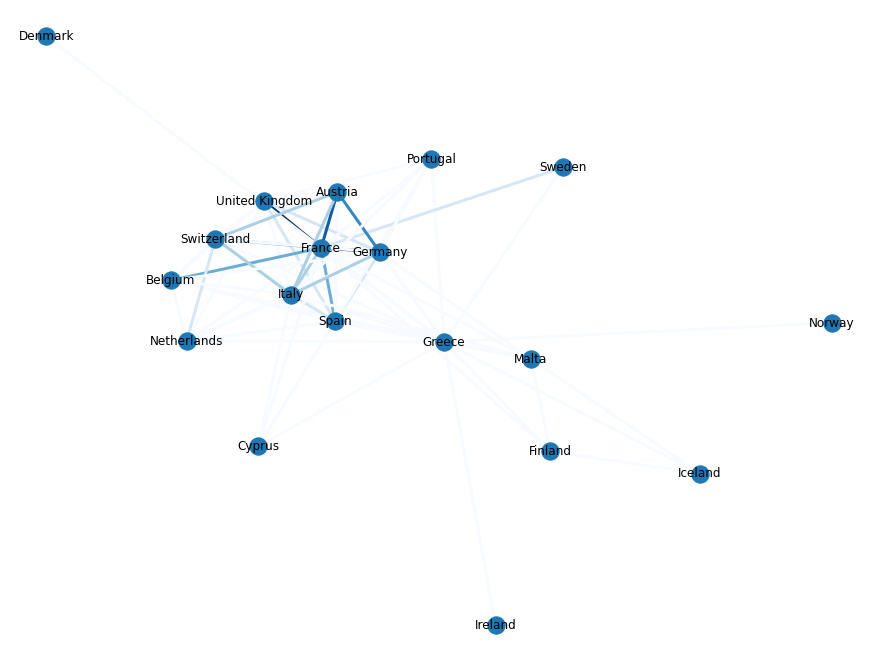

In [10]:
plt.rcParams['figure.figsize'] = (12, 9)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.spring_layout(G)
nx.draw(G, pos,edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues,with_labels = True)
plt.savefig(name+'.png')